In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.tsv",sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.shape

(5572, 4)

In [4]:
#We have 5572 observations and 4 columns

In [5]:
df.dtypes

label      object
message    object
length      int64
punct       int64
dtype: object

In [6]:
# we have 2 object columns and 2 numerical columns

In [7]:
#we need to check any data is missing

In [8]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
#This dataset is free from null values

In [10]:
#we can perform statsitical analysis
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [11]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
df["label"].value_counts()/len(df)

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x215a6601dd0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

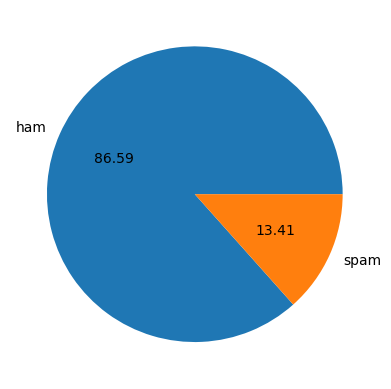

In [13]:
plt.pie(df["label"].value_counts(),labels=df["label"].value_counts().index,autopct="%.2f")

In [14]:
#we have 86% of ham category and 13% of spam category which is imbalanced dataset
# we need to collect more data that is one way to overcome of it
#we need to make the data equalize

In [15]:
ham=df[df["label"]=="ham"]
spam=df[df["label"]=="spam"]

In [16]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [17]:
#equalize we can randomly pick 747 or close to 747 dataset from ham

In [18]:
ham=ham.sample(spam.shape[0])

In [19]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [20]:
#we sampled based on spam shape

In [21]:
#here we created new dataframe for ham,spam

In [22]:
data = pd.concat([ham, spam], ignore_index=True)

In [23]:
data.shape

(1494, 4)

([<matplotlib.patches.Wedge at 0x215a66e0c50>,
 [Text(6.735557395310444e-17, 1.1, 'ham'),
  Text(-2.0206672185931328e-16, -1.1, 'spam')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

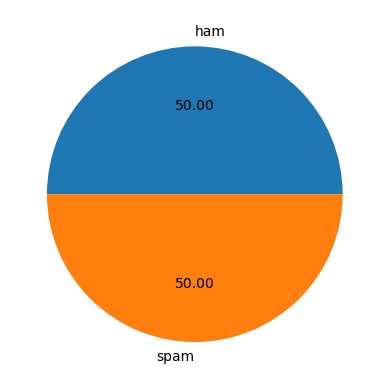

In [24]:
plt.pie(data["label"].value_counts(),labels=data["label"].value_counts().index,autopct="%.2f")

In [25]:
#univariant analysis on length

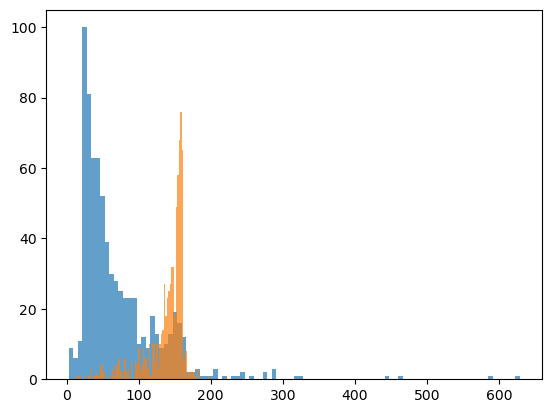

In [26]:
plt.hist(data[data["label"]=="ham"]["length"],bins=100,alpha=0.7)
plt.hist(data[data["label"]=="spam"]["length"],bins=100,alpha=0.7)
plt.show()

In [27]:
#univariant analysis on punct

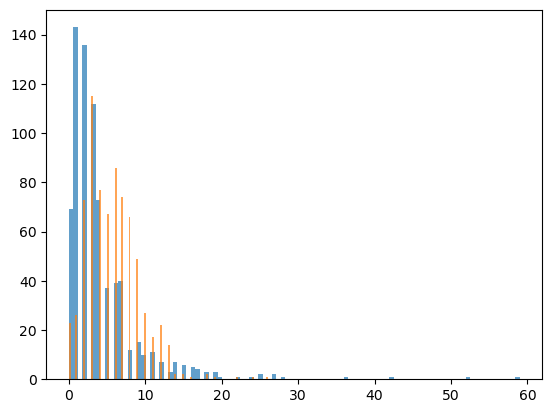

In [28]:
plt.hist(data[data["label"]=="ham"]["punct"],bins=100,alpha=0.7)
plt.hist(data[data["label"]=="spam"]["punct"],bins=100,alpha=0.7)
plt.show()

In [29]:
#Bivariant analysis

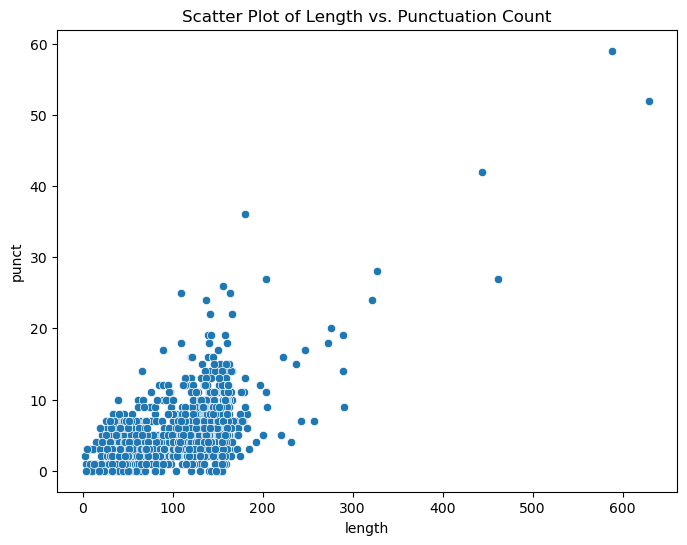

In [30]:
# Scatter plot for length vs. punct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='punct', data=data)
plt.title('Scatter Plot of Length vs. Punctuation Count')
plt.show()

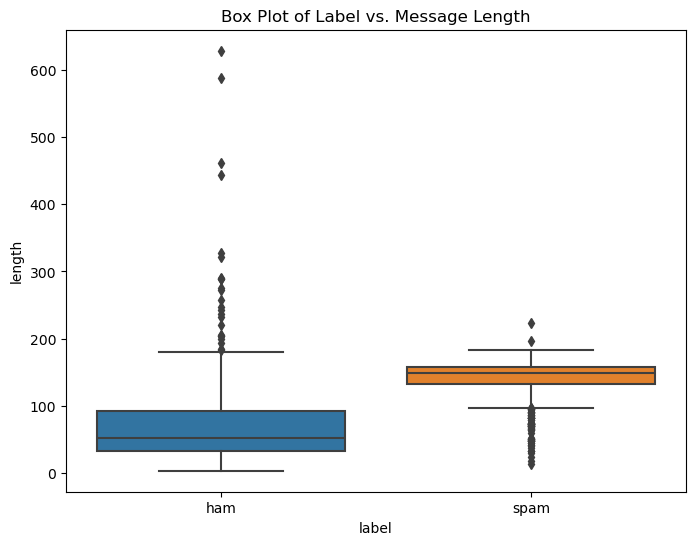

In [31]:
# Box plot for label vs. length
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='length', data=data)
plt.title('Box Plot of Label vs. Message Length')
plt.show()

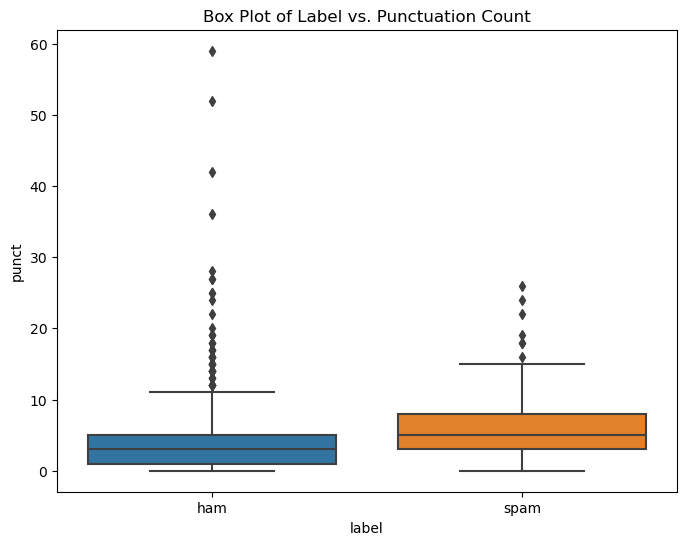

In [32]:
# Box plot for label vs. punct
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='punct', data=data)
plt.title('Box Plot of Label vs. Punctuation Count')
plt.show()

In [33]:
#multivaraint
data.dtypes

label      object
message    object
length      int64
punct       int64
dtype: object

In [34]:
data.corr(numeric_only=True)

,length,punct
length,1.000000,0.627741
punct,0.627741,1.000000


C:\Users\srinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


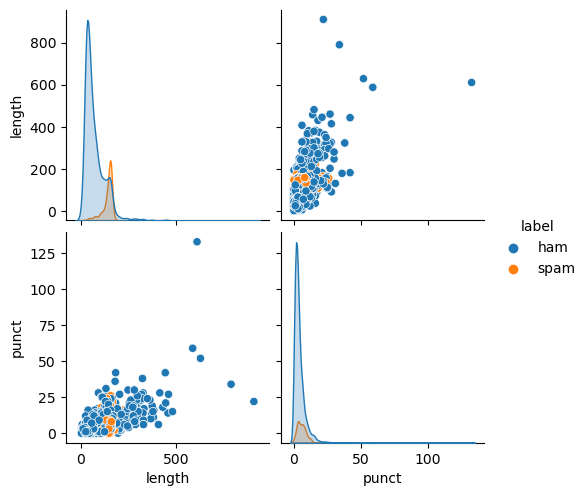

In [35]:
sns.pairplot(df, hue='label', vars=['length', 'punct'])
plt.show()

In [36]:
#SPLITTING DATA INTO TRAIN AND TEST:
from sklearn.model_selection import train_test_split

In [37]:
# Features and target variable
X = data['message']
y = data['label']

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=10)

In [39]:
#Building the model
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1045,)
(1045,)
(449,)
(449,)


In [40]:
#Random forest
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [41]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=10))])

In [42]:
classifier.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [43]:
y_pred=classifier.predict(xtest)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
accuracy_score(ytest,y_pred)

0.9198218262806236

In [46]:
confusion_matrix(ytest,y_pred)

array([[211,   4],
       [ 32, 202]], dtype=int64)

In [47]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92       215
        spam       0.98      0.86      0.92       234

    accuracy                           0.92       449
   macro avg       0.92      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



In [48]:
#svm
from sklearn.svm import SVC

In [49]:
classifier1=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma="auto"))])

In [50]:
classifier1.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [51]:
y_pred1=classifier1.predict(xtest)

In [52]:
accuracy_score(ytest,y_pred1)

0.8730512249443207

In [53]:
confusion_matrix(ytest,y_pred1)

array([[215,   0],
       [ 57, 177]], dtype=int64)

In [54]:
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

         ham       0.79      1.00      0.88       215
        spam       1.00      0.76      0.86       234

    accuracy                           0.87       449
   macro avg       0.90      0.88      0.87       449
weighted avg       0.90      0.87      0.87       449



In [55]:
test1=["Congratulations! You've won a free vacation."]
test2=["Hey, what's up?"]
test3=["Meeting tomorrow at 10 AM."]
test4=["Click here for more details."]

In [56]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['spam']
['ham']
['ham']
['ham']


In [57]:
print(classifier1.predict(test1))
print(classifier1.predict(test2))
print(classifier1.predict(test3))
print(classifier1.predict(test4))

['spam']
['ham']
['ham']
['ham']
